# Deep Neural Networks Laboration

Data used in this laboration are from the Kitsune Network Attack Dataset, https://archive.ics.uci.edu/ml/datasets/Kitsune+Network+Attack+Dataset . We will focus on the 'Mirai' part of the dataset. Your task is to make a DNN that can classify if each attack is benign or malicious. The dataset has 116 covariates, but to make it a bit more difficult we will remove the first 24 covariates.

You need to answer all questions in this notebook.

# Part 1: Get the data

Skip this part if you load stored numpy arrays (Mirai*.npy) (which is recommended)

Use `wget` in the terminal of your cloud machine (in the same directory as where you have saved this notebook) to download the data, i.e.

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_dataset.csv.gz

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_labels.csv.gz

Then unpack the files using `gunzip` in the terminal, i.e.

gunzip Mirai_dataset.csv.gz

gunzip Mirai_labels.csv.gz

# Part 2: Get a graphics card

Skip this part if you run on the CPU

Lets make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming calculations in every training iteration.

In [1]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True) 

IndexError: list index out of range

# Part 3: Hardware

Skip questions 1, 2, 3, 5, 6 if you use your own computer.

In deep learning, the computer hardware is very important. You should always know what kind of hardware you are working on.

Question 1: What graphics card is available in the cloud machine? Run 'nvidia-smi' in the terminal. 

Question 2: Google the name of the graphics card, how many CUDA cores does it have?

Question 3: How much memory does the graphics card have?

Question 4: What is stored in the GPU memory while training a DNN ?

Question 5: What CPU is available in the cloud machine? How many cores does it have? Run 'lscpu' in the terminal.

Question 6: How much CPU memory (RAM) is available in the cloud machine? Run 'free -g' in the terminal.

# Part 4: Load the data

To make this step easier, directly load the data from saved numpy arrays (.npy) (recommended)


Load the dataset from the csv files, it will take some time since it is almost 1.4 GB. 

We will use the function `genfromtxt` to load the data.

https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html

Load the data from csv files the first time, then save the data as numpy files for faster loading the next time.


In [72]:
from numpy import genfromtxt
import numpy as np

# Load data from numpy arrays
X = np.load('Mirai_data.npy')
Y = np.load('Mirai_labels.npy')



# Remove the first 24 covariates (columns)
X=np.delete(X,np.s_[0:24],axis=1)

print('The covariates have size {}.'.format(X.shape))
print('The labels have size {}.'.format(Y.shape))

# Print the number of examples of each class
Class_0=len(np.where(Y==0)[0])   
print("Number of Examples in Class_0 is {}".format(Class_0))
Class_1=len(np.where(Y==1)[0])   
print("Number of Examples in Class_1 is {}".format(Class_1))

The covariates have size (764137, 92).
The labels have size (764137,).
Number of Examples in Class_0 is 121621
Number of Examples in Class_1 is 642516


# Part 5: How good is a naive classifier?

Question 7: Given the number of examples from each class, how high classification performance can a naive classifier obtain? The naive classifier will assume that all examples belong to one class. Note: you do not need to make a naive classifier, this is a theoretical question, just to understand how good performance we can obtain by guessing that all examples belong to one class.

Answer: The naive classifier classifies all examples as one class. In this case, if the naive classifier classifies as Class 1, then it achieves highest classification performance. This is because Class 1 has more occurences than Class 0. Therefore the maximum performance it can obtain is: # of occurences of Class 1/ Total # of observations = 642516/764137

In [73]:
# It is common to have NaNs in the data, lets check for it. Hint: np.isnan()
np.isnan(X)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [74]:
# Print the number of NaNs in the covariates
print("The number of nans in each column of the covariates is  : {}".format(sum(np.isnan(X))))# 

print("The total number of nans in the covariates is {} ".format(np.count_nonzero(np.isnan(X))))

The number of nans in each column of the covariates is  : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The total number of nans in the covariates is 0 


In [75]:
# Print the number of NaNs (not a number) in the labels
print("The total number of nans in the labels is {} ".format(np.count_nonzero(np.isnan(Y))))


The total number of nans in the labels is 0 


# Part 6: Preprocessing

Lets do some simple preprocessing

In [76]:
# Convert covariates to floats
data= X.astype(np.float64)

# Convert labels to integers
label=Y.astype(np.int64)

# Remove mean of each covariate (column)
mean=np.mean(data,axis=0)
data=data-mean

# Divide each covariate (column) by its standard deviation
std=np.std(data,axis=0)
data=data/std

# Check that mean is 0 and standard deviation is 1 for all covariates, by printing mean and std
print("Mean of the covariates is",np.mean(data,axis=0))
print("Standard deviation of the covariates is ",np.std(data,axis=0))

Mean of the covariates is [-3.19451533e-18 -6.32970181e-14  1.19926356e-13  4.56743018e-15
  4.10210037e-14  1.46130975e-13  5.85246484e-16 -1.69734859e-14
 -3.36915700e-13  1.28688437e-12 -2.69360995e-12 -1.10733213e-13
 -1.22392702e-13 -1.70649630e-13 -1.02461166e-14  2.50701280e-12
  1.47553162e-12  1.08446837e-12 -1.04981959e-13  6.83458762e-14
 -1.03373555e-13  5.98825773e-14 -1.02025960e-12 -1.68983055e-12
 -1.79101143e-12 -1.31828514e-13  4.42580403e-13  6.14635580e-13
  5.78048199e-14 -4.92623328e-13 -2.54513072e-12  1.86544900e-13
 -1.53444593e-13  1.68079591e-12  9.30041709e-13  1.50738177e-13
 -1.15688852e-12 -3.62610361e-13 -1.71390937e-12 -2.09264067e-13
  1.07161976e-12 -1.45236885e-12 -1.69724579e-14 -1.64918984e-16
 -5.13444996e-14 -1.02171349e-14 -1.74685907e-15  1.34264921e-13
  5.98801969e-14  1.48745574e-17 -4.25442340e-13  5.78079594e-14
  1.25638129e-15  1.69449684e-13  1.50725881e-13  2.14439542e-14
  3.65457183e-14  1.17260451e-13 -8.82752870e-13 -6.34816648e-13

# Part 7: Split the dataset

Use the first 70% of the dataset for training, leave the other 30% for validation and test, call the variables

Xtrain (70%)

Xtemp  (30%)

Ytrain (70%)

Ytemp  (30%)

We use a function from scikit learn.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [77]:
from sklearn.model_selection import train_test_split

# Your code
Xtrain, Xtemp, Ytrain, Ytemp = train_test_split(data, label, test_size=0.3, random_state=9)


print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xtemp has size {}.'.format(Xtemp.shape))
print('Ytemp has size {}.'.format(Ytemp.shape))

# Print the number of examples of each class, for the training data and the remaining 30%

print("Number of observation in class_0 for train is {}".format(len(np.where(Ytrain==0)[0])))
print("Number of observation in class_1 for train is {}".format(len(np.where(Ytrain==1)[0])))
print("Number of observation in class_0 for validation and test is {}".format(len(np.where(Ytemp==0)[0])))
print("Number of observation in class_1 for validation and test is {}".format(len(np.where(Ytemp==1)[0])))

Xtrain has size (534895, 92).
Ytrain has size (534895,).
Xtemp has size (229242, 92).
Ytemp has size (229242,).
Number of observation in class_0 for train is 84806
Number of observation in class_1 for train is 450089
Number of observation in class_0 for validation and test is 36815
Number of observation in class_1 for validation and test is 192427


#  Part 8: Split non-training data data into validation and test
Now split your non-training data (Xtemp, Ytemp) into 50% validation (Xval, Yval) and 50% testing (Xtest, Ytest), we use a function from scikit learn. 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Do all variables (Xtrain,Ytrain), (Xval,Yval), (Xtest,Ytest) have the shape that you expect?

Answer: The total number of observations in the entire dataset is 764137. 30% of this is 229241.1. The temp dataset has 229242 observations which is slightly greater than 30%. Consequently, training dataset has slightly less than 70% data. Also, 50% of 229242 is 114621 and it is the size of the test and validation datasets, where it is properly and equally divided 

In [78]:
from sklearn.model_selection import train_test_split

Xval, Xtest, Yval, Ytest = train_test_split(Xtemp, Ytemp, test_size=0.5, random_state=9)


print('The validation and test data have size {}, {}, {} and {}'.format(Xval.shape, Xtest.shape, Yval.shape, Ytest.shape))

The validation and test data have size (114621, 92), (114621, 92), (114621,) and (114621,)


# Part 9: DNN classification

Finish this code to create a first version of the classifier using a DNN. Start with a simple network with 2 dense layers (with 20 nodes each), using sigmoid activation functions. The final dense layer should have a single node and a sigmoid activation function. We start with the SGD optimizer.

For different parts of this notebook you need to go back here, add more things, and re-run this cell to re-define the build function.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/layers/core/ for information on how the `Dense()` function works

Import a relevant cost / loss function for binary classification from keras.losses (https://keras.io/losses/)

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method


In [79]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense,BatchNormalization,Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.losses import binary_crossentropy as bc

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_DNN(input_shape, n_layers, n_nodes, act_fun='sigmoid', optimizer='sgd', learning_rate=0.01, 
              use_bn=False, use_dropout=False, use_custom_dropout=False):
    
    # Setup optimizer, depending on input parameter string
    if optimizer == "sgd":
        opt=SGD(learning_rate=learning_rate)
    if optimizer == "adam":
        opt=Adam(learning_rate=learning_rate)
   
    
    # Setup a sequential model
    model = Sequential()

    # Add layers to the model, using the input parameters of the build_DNN function
    if use_bn is True:
        model.add(BatchNormalization())
    if use_dropout is True:
        model.add(Dropout(0.5))
    if use_custom_dropout is True:
        model.add(myDropout(0.5))        
    
    
    # Add first layer, requires input shape
    model.add( Dense (n_nodes ,activation=act_fun ,input_shape =input_shape))
    
    # Add remaining layers, do not require input shape
    for i in range(n_layers-1):
        model.add(Dense(n_nodes,activation=act_fun))
        if use_bn is True:
            model.add(BatchNormalization())
        if use_dropout is True:
            model.add(Dropout(0.5))
        if use_custom_dropout is True:
            model.add(myDropout(0.5)) 
        
           
    
    
    # Final layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile modelmodel.compile(loss=BC, optimizer=optimizer, metrics=['accuracy']
    model.compile(loss=bc, optimizer=opt, metrics=['accuracy'])

    
    return model

In [80]:
# Lets define a help function for plotting the training results

import matplotlib.pyplot as plt
def plot_results(history):
    
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

# Part 10: Train the DNN

Time to train the DNN, we start simple with 2 layers with 20 nodes each, learning rate 0.1.

Relevant functions

`build_DNN`, the function we defined in Part 9, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method


### 2 layers, 20 nodes

In [81]:
# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape = Xtrain.shape
n_layers=2
n_nodes=20

# Build the model 
model1 = build_DNN(input_shape=input_shape, n_layers=n_layers,n_nodes=n_nodes,learning_rate=0.1)


# Train the model, provide training data and validation data
history1 = model1.fit(Xtrain,Ytrain,batch_size=batch_size,epochs=epochs,verbose=92,validation_data=(Xval,Yval))

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


In [82]:
# Evaluate the model on the test data
score = model1.evaluate(Xtest,Ytest)
                        
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 2s 508us/step - loss: 0.1720 - accuracy: 0.9087
Test loss: 0.1720
Test accuracy: 0.9087


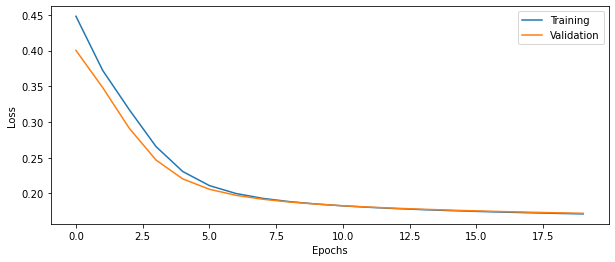

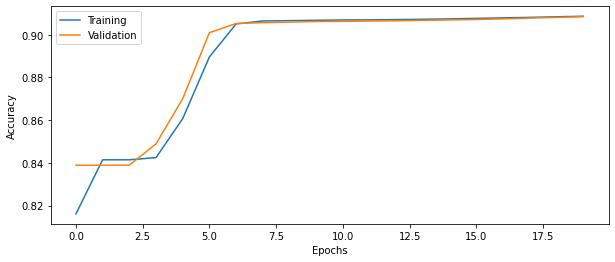

In [83]:
# Plot the history from the training run
plot_results(history1)

# Part 11: More questions

Question 8: What happens if you add several Dense layers without specifying the activation function?

Question 9: How are the weights in each dense layer initialized as default? How are the bias weights initialized?


Answer 8: If we did not specify activation function,then the model will be used as regression model.So it doesn't work as a classification model to do binary classification.

Answer 9: ###########



# Part 12: Balancing the classes

This dataset is rather unbalanced, we need to define class weights so that the training pays more attention to the class with fewer samples. We use a function in scikit learn

https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

In [84]:
np.unique(Ytrain)

array([0, 1], dtype=int64)

In [85]:
from sklearn.utils import class_weight

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(Ytrain),
                                                 Ytrain)

# Print the class weights 
print(class_weights)
# Keras wants the weights in this form, uncomment and change value1 and value2 to your weights, 
# or get them from the array that is returned from class_weight

class_weights = {0: 1.0,
               1: 2.0}


[3.15363889 0.59421026]


### 2 layers, 20 nodes, class weights

In [86]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape
n_layers=2
n_nodes=20

# Build and train model
model2 = build_DNN(input_shape=input_shape, n_layers=n_layers,n_nodes=n_nodes,learning_rate=0.1)

history2 = model2.fit(Xtrain,Ytrain,batch_size=batch_size,epochs=epochs,verbose=92,validation_data=(Xval,Yval),class_weight=class_weights)


model2.summary()

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 534895, 20)        1860      
_________________________________________________________________
dense_53 (Dense)             (None, 534895, 20)        420       
_________________________________________________________________
dense_54 (Dense)             (None, 534895, 1)         21        
Total params: 2,301
Trainable params: 2,301
Non-trainable params: 0
_________________________________________________________________


In [87]:
# Evaluate model on test data
score = model2.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 2s 442us/step - loss: 0.1857 - accuracy: 0.8693
Test loss: 0.1857
Test accuracy: 0.8693


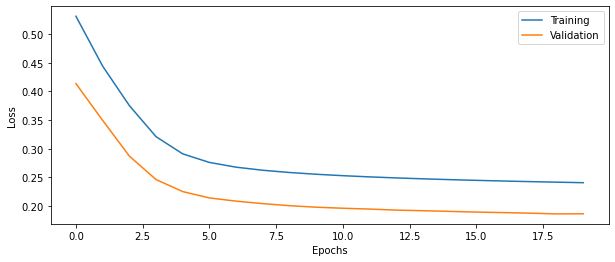

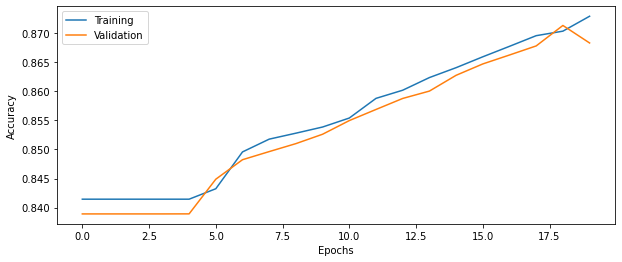

In [88]:
plot_results(history2)

# Part 13: More questions

Skip questions 11 and 12 if you run on the CPU

Question 10: Why do we have to use a batch size? Why can't we simply use all data at once? This is more relevant for even larger datasets.

Question 11: How busy is the GPU for a batch size of 100? How much GPU memory is used? Hint: run 'nvidia-smi' on the cloud computer a few times during training.

Question 12: What is the processing time for one training epoch when the batch size is 100? What is the processing time for one epoch when the batch size is 1,000? What is the processing time for one epoch when the batch size is 10,000? Explain the results. 

Question 13: How many times are the weights in the DNN updated in each training epoch if the batch size is 100? How many times are the weights in the DNN updated in each training epoch if the batch size is 1,000? How many times are the weights in the DNN updated in each training epoch if the batch size is 10,000?  

Question 14: What limits how large the batch size can be?

Question 15: Generally speaking, how is the learning rate related to the batch size? If the batch size is decreased, how should the learning rate be changed?

Lets use a batch size of 10,000 from now on, and a learning rate of 0.1.

Answer 10: Batch size is the important hyper parameter---Batch Size = Size of Training Set,if we use whole data for training,it occupies the full memory of the model,then it gives worng prediction for test data.

Answer 13:######
    

Answer 14:The higher limit of batch size is maximum data of the training set.Using the entire data will reduce the efficiency of the model.so limit the load to GPU by giving the mini batches of batch size

Answer 15:Its more logical because bigger the batch size means more confidence in the direction of your descent.so if the batch size decreased by n times, then leaning rate reduced y square root n

# Part 14: Increasing the complexity

Lets try some different configurations of number of layers and number of nodes per layer.

Question 16: How many trainable parameters does the network with 4 dense layers with 50 nodes each have, compared to the initial network with 2 layers and 20 nodes per layer? Hint: use model.summary()

### 4 layers, 20 nodes, class weights

In [89]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape
n_layers=4
n_nodes=20

# Build and train model
model3 = build_DNN(input_shape=input_shape, n_layers=n_layers,n_nodes=n_nodes,learning_rate=0.1)

history3 = model3.fit(Xtrain,Ytrain,batch_size=batch_size,epochs=epochs,verbose=92,validation_data=(Xval,Yval),class_weight=class_weights)
model3.summary()

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 534895, 20)        1860      
_________________________________________________________________
dense_56 (Dense)             (None, 534895, 20)        420       
_________________________________________________________________
dense_57 (Dense)             (None, 534895, 20)        420       
_________________________________________________________________
dense_58 (Dense)             (None, 534895, 20)        420       
_________________________________________________________________
dense_59 (Dense)             (None, 534895, 1)         21        
Total params: 3,141


In [90]:
# Evaluate model on test data
score = model3.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 2s 494us/step - loss: 0.4337 - accuracy: 0.8399
Test loss: 0.4337
Test accuracy: 0.8399


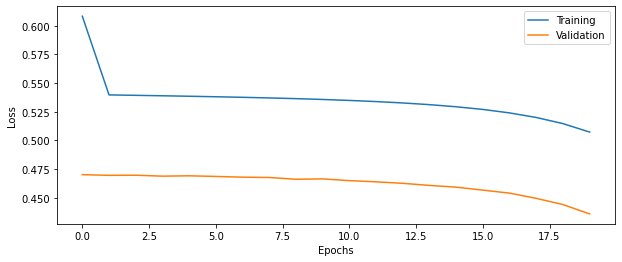

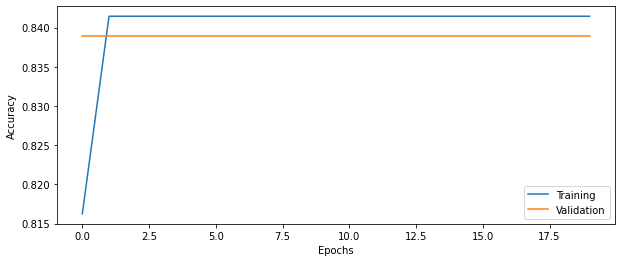

In [91]:
plot_results(history3)

### 2 layers, 50 nodes, class weights

In [92]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape
n_layers=2
n_nodes=50

# Build and train model
model4 = build_DNN(input_shape=input_shape, n_layers=n_layers,n_nodes=n_nodes,learning_rate=0.1)

history4 = model4.fit(Xtrain,Ytrain,batch_size=batch_size,epochs=epochs,verbose=92,validation_data=(Xval,Yval),class_weight=class_weights)
model4.summary()

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 534895, 50)        4650      
_________________________________________________________________
dense_61 (Dense)             (None, 534895, 50)        2550      
_________________________________________________________________
dense_62 (Dense)             (None, 534895, 1)         51        
Total params: 7,251
Trainable params: 7,251
Non-trainable params: 0
_________________________________________________________________


In [93]:
# Evaluate model on test data
score = model4.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 2s 432us/step - loss: 0.1854 - accuracy: 0.8749
Test loss: 0.1854
Test accuracy: 0.8749


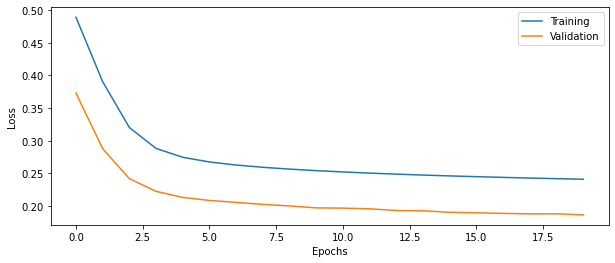

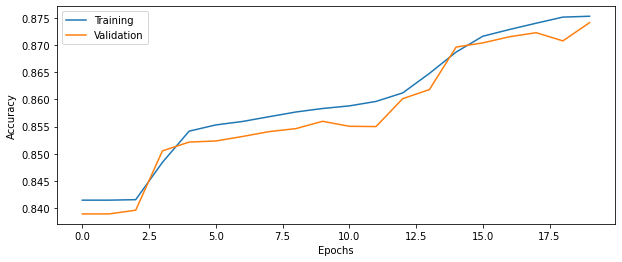

In [94]:
plot_results(history4)

### 4 layers, 50 nodes, class weights

In [95]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape
n_layers=4
n_nodes=50

# Build and train model
model5 = build_DNN(input_shape=input_shape, n_layers=n_layers,n_nodes=n_nodes,learning_rate=0.1)

history5 = model5.fit(Xtrain,Ytrain,batch_size=batch_size,epochs=epochs,verbose=92,validation_data=(Xval,Yval),class_weight=class_weights)

model5.summary()

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 534895, 50)        4650      
_________________________________________________________________
dense_64 (Dense)             (None, 534895, 50)        2550      
_________________________________________________________________
dense_65 (Dense)             (None, 534895, 50)        2550      
_________________________________________________________________
dense_66 (Dense)             (None, 534895, 50)        2550      
_________________________________________________________________
dense_67 (Dense)             (None, 534895, 1)         51        
Total params: 12,351

In [96]:
# Evaluate model on test data
score = model5.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 2s 452us/step - loss: 0.3608 - accuracy: 0.8399
Test loss: 0.3608
Test accuracy: 0.8399


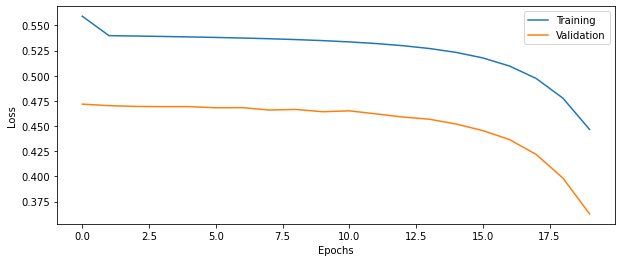

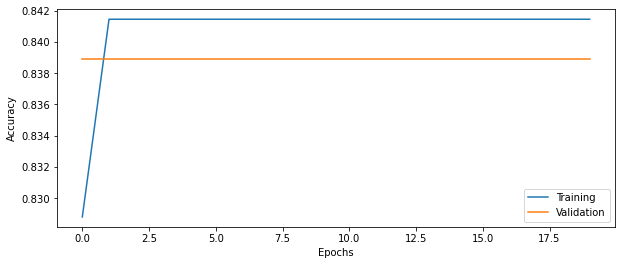

In [97]:
plot_results(history5)

# Part 15: Batch normalization

Now add batch normalization after each dense layer in `build_DNN`. Remember to import BatchNormalization from keras.layers. 

See https://keras.io/layers/normalization/ for information about how to call the function.

Question 17: Why is batch normalization important when training deep networks?

Answeer 17: It is a technique to normalize the value in each input layer of the model.This will also improve the learning rate of the model.

### 2 layers, 20 nodes, class weights, batch normalization

In [98]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape
n_layers=2
n_nodes=20

# Build and train model
model6 = build_DNN(input_shape=input_shape, n_layers=n_layers,n_nodes=n_nodes,learning_rate=0.1,use_bn=True)

history6 = model6.fit(Xtrain,Ytrain,batch_size=batch_size,epochs=epochs,verbose=92,validation_data=(Xval,Yval),class_weight=class_weights)

model6.summary()

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_18 (Batc (None, 92)                368       
_________________________________________________________________
dense_68 (Dense)             (None, 20)                1860      
_________________________________________________________________
dense_69 (Dense)             (None, 20)                420       
_________________________________________________________________
batch_normalization_19 (Batc (None, 20)                80        
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 21        
Total params: 2,749


In [99]:
# Evaluate model on test data
score = model6.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 1s 410us/step - loss: 0.1613 - accuracy: 0.8910
Test loss: 0.1613
Test accuracy: 0.8910


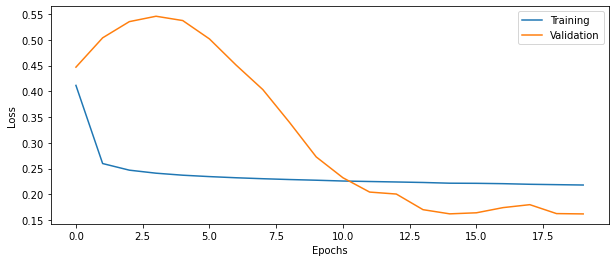

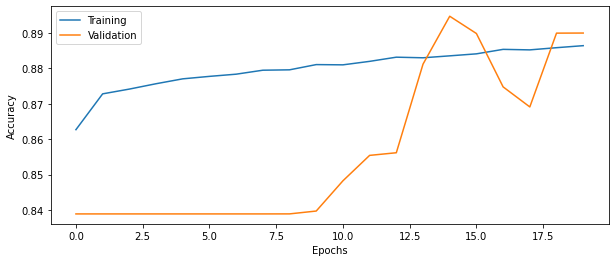

In [100]:
plot_results(history6)

# Part 16: Activation function

Try changing the activation function in each layer from sigmoid to ReLU, write down the test accuracy.

Note: the last layer should still have a sigmoid activation function.

https://keras.io/api/layers/activations/

### 2 layers, 20 nodes, class weights, ReLU, no batch normalization

In [101]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape
n_layers=2
n_nodes=20

# Build and train model
model7 = build_DNN(input_shape=input_shape, n_layers=n_layers,n_nodes=n_nodes,act_fun="sigmoid",learning_rate=0.1,use_bn=True)

history7 = model7.fit(Xtrain,Ytrain,batch_size=batch_size,epochs=epochs,verbose=92,validation_data=(Xval,Yval),class_weight=class_weights) 

model7.summary()

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_20 (Batc (None, 92)                368       
_________________________________________________________________
dense_71 (Dense)             (None, 20)                1860      
_________________________________________________________________
dense_72 (Dense)             (None, 20)                420       
_________________________________________________________________
batch_normalization_21 (Batc (None, 20)                80        
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 21        
Total params: 2,749


In [102]:
# Evaluate model on test data
score = model7.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 1s 412us/step - loss: 0.1693 - accuracy: 0.8792
Test loss: 0.1693
Test accuracy: 0.8792


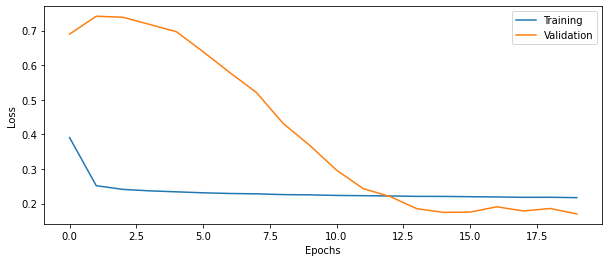

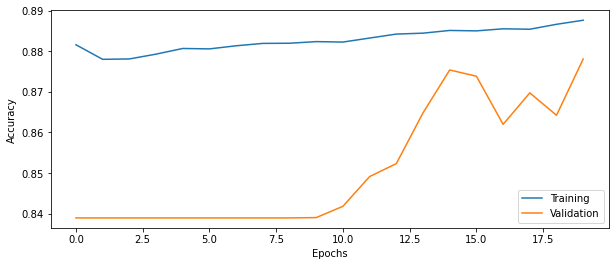

In [103]:
plot_results(history7)

# Part 17: Optimizer

Try changing the optimizer from SGD to Adam (with learning rate 0.1 as before). Remember to import the Adam optimizer from keras.optimizers. 

https://keras.io/optimizers/


### 2 layers, 20 nodes, class weights, Adam optimizer, no batch normalization, sigmoid activations

In [104]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape
n_layers=2
n_nodes=20

# Build and train model
model8 = build_DNN(input_shape=input_shape, n_layers=n_layers,n_nodes=n_nodes,act_fun="sigmoid",optimizer='adam',learning_rate=0.1,use_bn=True)

history8 = model8.fit(Xtrain,Ytrain,batch_size=batch_size,epochs=epochs,verbose=92,validation_data=(Xval,Yval),class_weight=class_weights) 

model8.summary()

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_22 (Batc (None, 92)                368       
_________________________________________________________________
dense_74 (Dense)             (None, 20)                1860      
_________________________________________________________________
dense_75 (Dense)             (None, 20)                420       
_________________________________________________________________
batch_normalization_23 (Batc (None, 20)                80        
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 21        
Total params: 2,749


In [105]:
# Evaluate model on test data
score =model8.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 2s 488us/step - loss: 0.1544 - accuracy: 0.8945
Test loss: 0.1544
Test accuracy: 0.8945


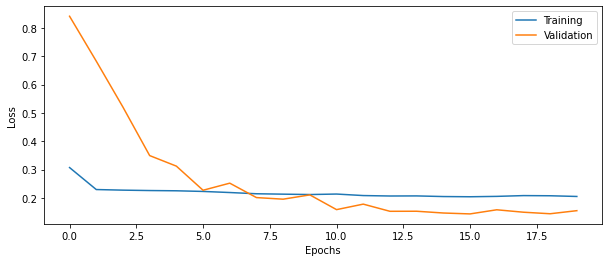

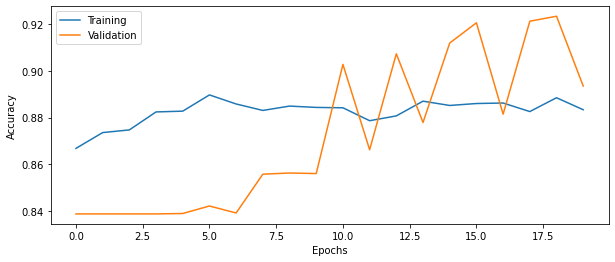

In [106]:
plot_results(history8)

In [107]:
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape
n_layers=2
n_nodes=20

# Build and train model
model8_5 = build_DNN(input_shape=input_shape, n_layers=n_layers,n_nodes=n_nodes,act_fun="sigmoid",optimizer='sgd',learning_rate=0.1,use_bn=True)

history8_5 = model8_5.fit(Xtrain,Ytrain,batch_size=batch_size,epochs=epochs,verbose=92,validation_data=(Xval,Yval),class_weight=class_weights) 

model8_5.summary()

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_24 (Batc (None, 92)                368       
_________________________________________________________________
dense_77 (Dense)             (None, 20)                1860      
_________________________________________________________________
dense_78 (Dense)             (None, 20)                420       
_________________________________________________________________
batch_normalization_25 (Batc (None, 20)                80        
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 21        
Total params: 2,749


In [108]:
# Evaluate model on test data
score =model8_5.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 2s 416us/step - loss: 0.1668 - accuracy: 0.8832
Test loss: 0.1668
Test accuracy: 0.8832


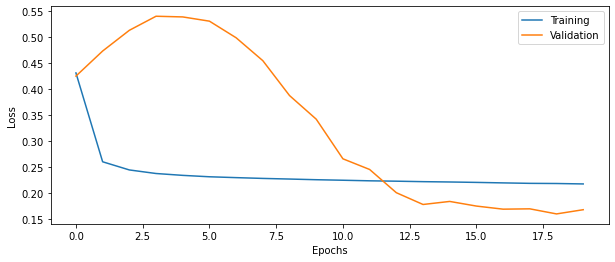

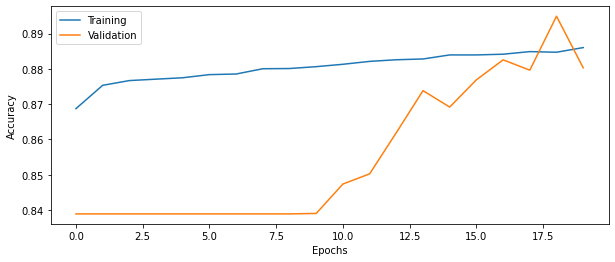

In [109]:
plot_results(history8_5)

# Part 18: Dropout regularization

Dropout is a type of regularization that can improve accuracy for validation and test data. 

Add a Dropout layer after each Dense layer (but not after the final dense layer) in `build_DNN`, with a dropout probability of 50%. Remember to first import the Dropout layer from keras.layers

See https://keras.io/api/layers/regularization_layers/dropout/ for how the Dropout layer works.

---

Question 18: How does the validation accuracy change when adding dropout?

Question 19: How does the test accuracy change when adding dropout?

Answer 18: The validataion accuracy is constant after we use Dropout Regularization.Where the model without Dropout, the validation accuracy is varying for every epochs.

Answer 19:The problem with Dropout is reduce the test data accuracy to 0.83%.

### 2 layers, 20 nodes, class weights, dropout, SGD optimizer, no batch normalization, sigmoid activations

In [110]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape
n_layers=2
n_nodes=20

# Build and train model
model9 = build_DNN(input_shape=input_shape, n_layers=n_layers,n_nodes=n_nodes,act_fun="sigmoid",optimizer='sgd',learning_rate=0.1,
                   use_dropout=True, use_custom_dropout=False)

history9 = model9.fit(Xtrain,Ytrain,batch_size=batch_size,epochs=epochs,verbose=92,validation_data=(Xval,Yval),class_weight=class_weights) 

model9.summary()


Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_4 (Dropout)          (None, 92)                0         
_________________________________________________________________
dense_80 (Dense)             (None, 20)                1860      
_________________________________________________________________
dense_81 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_5 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 21        
Total params: 2,301


In [111]:
# Evaluate model on test data
score = model9.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 2s 441us/step - loss: 0.2016 - accuracy: 0.8399
Test loss: 0.2016
Test accuracy: 0.8399


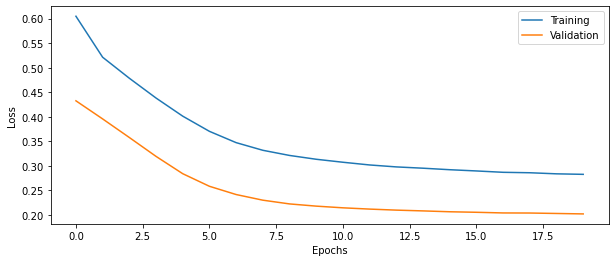

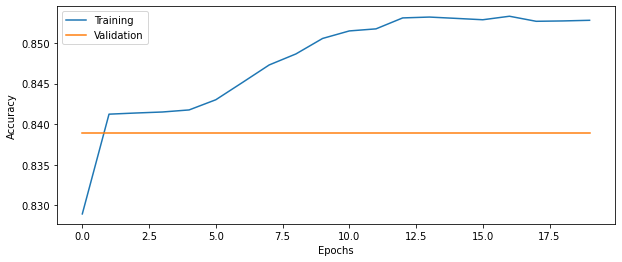

In [112]:
plot_results(history9)

# Part 19: Improving performance

Spend some time (30 - 90 minutes) playing with the network architecture (number of layers, number of nodes per layer, activation function) and other hyper parameters (optimizer, learning rate, batch size, number of epochs, degree of regularization). For example, try a much deeper network. How much does the training time increase for a network with 10 layers?

Question 20: How high classification accuracy can you achieve for the test data? What is your best configuration?

I found the best configuration for this model is given below and highest classification accuracy achieved is 0.90%.

In [113]:
# Find your best configuration for the DNN
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape
n_layers=2
n_nodes=30

# Build and train DNN
model10 = build_DNN(input_shape=input_shape, n_layers=n_layers,n_nodes=n_nodes,act_fun="relu",optimizer='sgd',learning_rate=0.1,use_bn=True,
                   use_dropout=False, use_custom_dropout=False)

history10 = model10.fit(Xtrain,Ytrain,batch_size=batch_size,epochs=epochs,verbose=92,validation_data=(Xval,Yval)) 

model10.summary()


Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_26 (Batc (None, 92)                368       
_________________________________________________________________
dense_83 (Dense)             (None, 30)                2790      
_________________________________________________________________
dense_84 (Dense)             (None, 30)                930       
_________________________________________________________________
batch_normalization_27 (Batc (None, 30)                120       
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 31        
Total params: 4,239


In [114]:
# Evaluate DNN on test data
score =model10.evaluate(Xtest,Ytest) 

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 2s 463us/step - loss: 0.1468 - accuracy: 0.9198
Test loss: 0.1468
Test accuracy: 0.9198


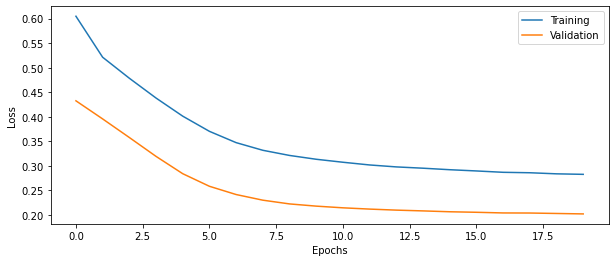

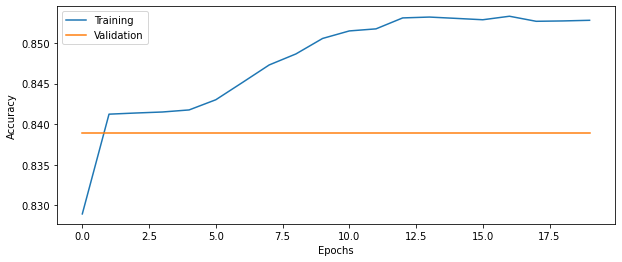

In [115]:
plot_results(history9)

# Part 20: Dropout uncertainty

Dropout can also be used during testing, to obtain an estimate of the model uncertainty. Since dropout will randomly remove connections, the network will produce different results every time the same (test) data is put into the network. This technique is called Monte Carlo dropout. For more information, see this paper http://proceedings.mlr.press/v48/gal16.pdf

To achieve this, we need to redefine the Keras Dropout call by running the cell below, and use 'myDropout' in each call to Dropout, in the cell that defines the DNN. The `build_DNN` function takes two boolean arguments, use_dropout and use_custom_dropout, add a standard Dropout layer if use_dropout is true, add a myDropout layer if use_custom_dropout is true.

Run the same test data through the trained network 100 times, with dropout turned on. 

Question 21: What is the mean and the standard deviation of the test accuracy?

In [116]:
import keras.backend as K
import keras

class myDropout(keras.layers.Dropout):
    """Applies Dropout to the input.
    Dropout consists in randomly setting
    a fraction `rate` of input units to 0 at each update during training time,
    which helps prevent overfitting.
    # Arguments
        rate: float between 0 and 1. Fraction of the input units to drop.
        noise_shape: 1D integer tensor representing the shape of the
            binary dropout mask that will be multiplied with the input.
            For instance, if your inputs have shape
            `(batch_size, timesteps, features)` and
            you want the dropout mask to be the same for all timesteps,
            you can use `noise_shape=(batch_size, 1, features)`.
        seed: A Python integer to use as random seed.
    # References
        - [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](
           http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
    """
    def __init__(self, rate, training=True, noise_shape=None, seed=None, **kwargs):
        super(myDropout, self).__init__(rate, noise_shape=None, seed=None,**kwargs)
        self.training = training

        
    def call(self, inputs, training=None):
        if 0. < self.rate < 1.:
            noise_shape = self._get_noise_shape(inputs)

            def dropped_inputs():
                return K.dropout(inputs, self.rate, noise_shape,
                                 seed=self.seed)
            if not training: 
                return K.in_train_phase(dropped_inputs, inputs, training=self.training)
            return K.in_train_phase(dropped_inputs, inputs, training=training)
        return inputs

### Your best config, custom dropout

In [117]:
# Your best training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape
n_layers=2
n_nodes=30

# Build and train model
model11 = build_DNN(input_shape=input_shape, n_layers=n_layers,n_nodes=n_nodes,act_fun="relu",optimizer='sgd',learning_rate=0.1,use_bn=True,
                   use_dropout=True, use_custom_dropout=False)

history11 = model11.fit(Xtrain,Ytrain,batch_size=batch_size,epochs=epochs,verbose=92,validation_data=(Xval,Yval)) 

model11.summary()


Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_28 (Batc (None, 92)                368       
_________________________________________________________________
dropout_6 (Dropout)          (None, 92)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 30)                2790      
_________________________________________________________________
dense_87 (Dense)             (None, 30)                930       
_________________________________________________________________
batch_normalization_29 (Batc (None, 30)                120       
____________________

In [118]:
# Run this cell a few times to evalute the model on test data, 
# if you get slightly different test accuracy every time, Dropout during testing is working

# Evaluate model on test data
score = model11.evaluate(Xtest,Ytest)
                       
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 2s 419us/step - loss: 0.1697 - accuracy: 0.9130
Test accuracy: 0.9130


In [119]:
# Run the testing 100 times, and save the accuracies in an array
accuracy=np.empty(100)
for i in range(100):
    v=model11.evaluate(Xtest,Ytest)
    accuracy[i]=v[1]

3582/3582 [==============================] - 2s 446us/step - loss: 0.1697 - accuracy: 0.9130


In [120]:
# Calculate and print mean and std of accuracies

print("Mean of the accuracies:",np.mean(accuracy))
print("Standard Deviation of the accuracies:",np.std(accuracy))


Mean of the accuracies: 0.9130263924598694
Standard Deviation of the accuracies: 0.0


# Part 21: Cross validation uncertainty

Cross validation (CV) is often used to evaluate a model, by training and testing using different subsets of the data it is possible to get the uncertainty as the standard deviation over folds. We here use a help function from scikit-learn to setup the CV, see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html . Use 10 folds with shuffling, random state 1234. 

Note: We here assume that you have found the best hyper parameters, so here the data are only split into training and testing, no validation.

---

Question 22: What is the mean and the standard deviation of the test accuracy?

Question 23: What is the main advantage of dropout compared to CV for estimating test uncertainty? The difference may not be so large in this notebook, but imagine that you have a network that takes 24 hours to train.

Answer 22: 
Mean of the test accuracy is 0.9147
Standard Deviation of the test accuracy is 0.0

Answer 23:



In [124]:
from sklearn.model_selection import StratifiedKFold

batch_size = 10000
epochs = 20
input_shape = Xtrain.shape
n_layers=2
n_nodes=30


# Define 10-fold cross validation
kfold_cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=123)
acc=np.empty(100)
# Loop over cross validation folds
#for i,j in kfold_cv.split(X,Y):
    #print("Train:",i,"Test:",j)
    #train_x,test_x=X[i],X[j]
    #train_y,test_y=Y[i],Y[j]
    
    
    
    
    
    #StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kfold_cv.split(X, Y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    # Calculate class weights for current split
    class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(Ytrain),
                                                 Ytrain)

    # Rebuild the DNN model, to not continue training on the previously trained model
    model=build_DNN(input_shape=input_shape,n_layers=n_layers,n_nodes=n_nodes,learning_rate=0.1,optimizer="adam",use_bn=True)
    
    # Fit the model with training set and class weights for this fold
    history=model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,class_weight=class_weights)
    
    # Evaluate the model using the test set for this fold
    score=model.evaluate(X_test,y_test)
    
    # Save the test accuracy in an array
    acc[i]=score[1]
    i+1

# Calculate and print mean and std of accuracies
np.mean(acc)
np.std(acc)


TRAIN: [     0      1      2 ... 764134 764135 764136] TEST: [    13     15     16 ... 764085 764113 764117]


C:\Users\Mowniesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[0 1], y=[1 1 1 ... 1 1 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Part 22: DNN regression

A similar DNN can be used for regression, instead of classification.

Question 24: How would you change the DNN in order to use it for regression instead?

## Report

Send in this jupyter notebook, with answers to all questions.